# VII.9.5a)

## Trapezoidal rule

Так как сетка равномерная, воспользуемся формулой Котеса

In [109]:
x = [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
f = [1.000000, 0.989616, 0.958851, 0.908852, 0.841471,
     0.759188, 0.664997, 0.562278, 0.454649]

h = 0.25
xs = len(x)
sum = 0
for i in range(1, xs - 1):
    sum += f[i]
sum += (f[0] + f[xs - 1]) / 2
sum *= h
print(f'Integral in trapezoidal rule = {sum}' )

Integral in trapezoidal rule = 1.6031443749999998


## Richardson extrapolation

In [110]:
sum_2h = 0
p = 2
for i in range(0, xs - 1, 2):
    sum_2h += (f[i] + f[i + 2]) * (x[i + 2] - x[i]) / 2
rint = sum + (sum - sum_2h) / (2 ** p - 1)
print(f'Integral in Richardson extrapolation = {rint}')

Integral in Richardson extrapolation = 1.6054185833333332


# Simpson's rule

In [111]:
ssum = 0
for i in range(0, xs - 1, 2):
    ssum += (x[i + 2] - x[i]) * (f[i + 2] + f[i] + 4 * f[i + 1]) / 6
print(f'Integral in Simpson\'s rule = {ssum}')

Integral in Simpson's rule = 1.6054185833333332


Видно, что уточненный результат экстраполяцией Ричардсона совпал с результатом, полученным правилом Симпсона

# VII.9.13a)

In [112]:
def tridiagonal_matrix_algorithm(A, f):
    N = len(f)
    a = [0.0 for i in range(N)]
    b = [0.0 for i in range(N)]
    c = [0.0 for i in range(N)]
    
    for i in range(N):
        b[i] = A[i][i]    
        if (i > 0):
            a[i] = A[i][i - 1]
        if (i < N - 1):
            c[i] = A[i][i + 1]
    
    p = [0.0 for i in range(N)]
    r = [0.0 for i in range(N)]
    
    p[0] = c[0] / b[0]
    r[0] = f[0] / b[0]
    for i in range(1, N):
        p[i] = c[i] / (b[i] - a[i] * p[i - 1])
        r[i] = (f[i] - a[i] * r[i - 1]) / (b[i] - a[i] * p[i - 1])
    
    x = [0.0 for i in range(N)]
    x[N - 1] = r[N - 1]
    for i in range(N - 2, -1, -1):
        x[i] = r[i] - p[i] * x[i + 1]

    return x

Text(0, 0.5, 'f(x)')

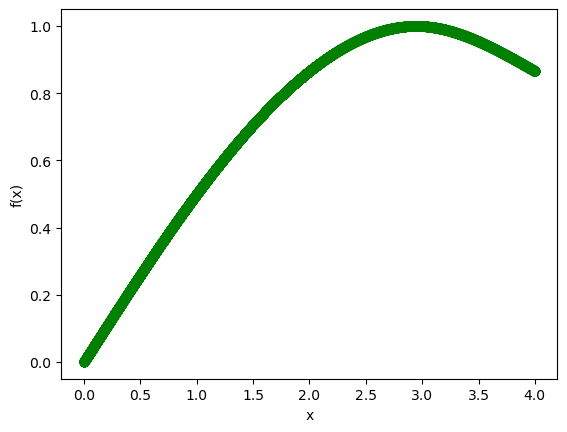

In [127]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4]
y = [0.00000, 0.50000, 0.86603, 1.00000, 0.86603]
k = 50

n = len(x)
f = [[0.0] * n for i in range(n)]
for i in range(n):
    f[i][0] = y[i]
    
for j in range(1, n):
    for i in range(j, n):
        f[i][j] = (f[i][j - 1] - f[i - 1][j - 1]) / (x[i] - x[i - j])

N = n - 1
a = [0.0 for i in range(N)]
b = [0.0 for i in range(N)]
d = [0.0 for i in range(N)]
h = [0.0 for i in range(N)]

# find h[i]
for i in range(N):
    h[i] = x[i + 1] - x[i]

# find c[i]
A = [[0.0] * (N - 1) for i in range(N - 1)]
for i in range(1, N - 2): 
    A[i][i] = 2
    A[i][i - 1] = h[i] / (h[i] + h[i + 1])
    A[i][i + 1] = h[i + 1] / (h[i] + h[i + 1])
A[0][0] = 2
A[0][1] = h[1] / (h[0] + h[1])
A[N - 2][N - 2] = 2
A[N - 2][N - 3] = h[N - 2] / (h[N - 2] + h[N - 1])

p = 2
u = [0.0] * (N - 1)
for i in range(N - 1):
    u[i] = 6 * f[i + p][2]
    
c = tridiagonal_matrix_algorithm(A, u)
c.append(0)

#find a[i], d[i]
for i in range(1, N):
    a[i] = y[i + 1]
    d[i] = (c[i] - c[i - 1]) / h[i]
a[0] = y[1]
d[0] = c[0] / h[0]

#find b[i]
p = 1
for i in range(1, N):
    b[i] = c[i] * h[i] / 3 + c[i - 1] * h[i] / 6 + f[i + p][1]
b[0] = c[0] * h[0] / 3 + f[p][1]

gr_y = []
gr_x = list(i / 10000 for i in range(40000))
xb = 0
xs = len(gr_x)
for j in range(xs):
    N = int(gr_x[j])
    if (N >= n - 1):
        N = n - 2
    
    sum1 = a[N]
    sum2 = b[N] * (gr_x[j] - x[N + 1])
    sum3 = c[N] * (gr_x[j] - x[N + 1]) * (gr_x[j] - x[N + 1]) / 2
    sum4 = d[N] * (gr_x[j] - x[N + 1]) * (gr_x[j] - x[N + 1]) * (gr_x[j] - x[N + 1]) / 6
    sum = sum1 + sum2 + sum3 + sum4
    gr_y.append(sum)

plt.plot(gr_x, gr_y, 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("f(x)")

find $\int_{0}^{4}f(x)\sin{kx}dx$

In [128]:
import math
n = len(gr_x)
sum = 0
for i in range(0, n - 2, 2):
    s3 = gr_y[i + 2] * math.sin(k * gr_x[i + 2])
    s2 = gr_y[i + 1] * math.sin(k * gr_x[i + 1])
    s1 = gr_y[i] * math.sin(k * gr_x[i])
    sum += (gr_x[i + 2] - gr_x[i]) * (s1 + 4 * s2 + s3) / 6
print(f'Integral = {sum}')

Integral = -0.008219790012085226
